In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data.csv")
df.head()

,Unnamed: 0,Entry_date,Entry_time,Type,Entry_price,Exit_price,Exit_time,Profit,Reason
0,0,2011-01-04,09:30:00,Short,11822.00,11611.200,15:20:00,206.0712,EOD
1,1,2011-01-05,09:40:00,Short,11474.00,11382.000,15:20:00,87.4104,EOD
2,2,2011-01-06,13:50:00,Short,11259.75,11304.789,14:15:00,-49.5429,SL
3,3,2011-01-06,14:50:00,Short,11253.00,11251.300,15:20:00,-2.8012,EOD
4,4,2011-01-07,09:50:00,Short,11150.00,11194.600,11:45:00,-49.0600,SL


In [4]:
# Calculate profit and loss
df['profit_loss'] = df.apply(lambda x: x['Exit_price'] - x['Entry_price'] if x['Type'] == 'long' else x['Entry_price'] - x['Exit_price'], axis=1)

In [5]:
# Calculate average profit per trade
avg_profit = df['profit_loss'].mean()

In [7]:
df['stop_loss'] = df.apply(lambda x: x['Entry_price'] - (x['Entry_price'] * 0.05) if x['Type'] == 'long' else x['Entry_price'] + (x['Entry_price'] * 0.05), axis=1)


In [8]:
# Evaluate performance
total_profit = df['profit_loss'].sum()
total_trades = len(df)
avg_profit = df['profit_loss'].mean()

print('Total Profit:', total_profit)
print('Total Trades:', total_trades)
print('Average Profit per Trade:', avg_profit)

Total Profit: -7459.230799999931
Total Trades: 3349
Average Profit per Trade: -2.227300925649427


In [9]:
# Calculate correlation
corr = df.corr()['profit_loss']


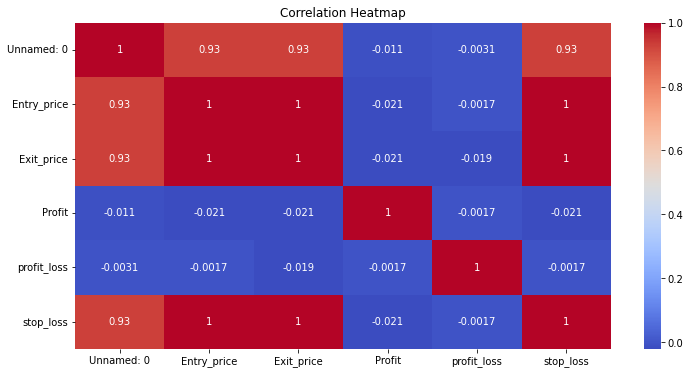

In [11]:
# Visualize correlation
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
print(corr)

Unnamed: 0    -0.003105
Entry_price   -0.001746
Exit_price    -0.018609
Profit        -0.001666
profit_loss    1.000000
stop_loss     -0.001746
Name: profit_loss, dtype: float64


In [14]:
negative_columns = ['Profit']


In [15]:
df = df.loc[(df[negative_columns] >= 0).all(axis=1)]

In [17]:
df.to_csv('Data.csv', index=False)

In [20]:
df

,Unnamed: 0,Entry_date,Entry_time,Type,Entry_price,Exit_price,Exit_time,Profit,Reason,profit_loss,stop_loss
0,0,2011-01-04,09:30:00,Short,11822.00,11611.20,15:20:00,206.07120,EOD,210.80,12413.1000
1,1,2011-01-05,09:40:00,Short,11474.00,11382.00,15:20:00,87.41040,EOD,92.00,12047.7000
6,6,2011-01-07,15:05:00,Short,11134.00,11085.90,15:20:00,43.64640,EOD,48.10,11690.7000
8,8,2011-01-10,11:45:00,Short,10928.50,10695.20,15:20:00,228.92860,EOD,233.30,11474.9250
9,9,2011-01-12,14:30:00,Long,11075.00,11139.00,15:20:00,59.57000,EOD,-64.00,11628.7500
...,...,...,...,...,...,...,...,...,...,...,...
3340,3340,2023-02-27,14:05:00,Long,40495.45,40545.00,15:20:00,33.35182,EOD,-49.55,42520.2225
3341,3341,2023-03-01,09:40:00,Long,40719.95,40910.15,15:20:00,173.91202,EOD,-190.20,42755.9475
3343,3343,2023-03-03,09:20:00,Long,40900.00,41415.45,15:20:00,499.09000,EOD,-515.45,42945.0000
3347,3347,2023-03-10,09:20:00,Short,40752.65,40615.00,15:20:00,121.34894,EOD,137.65,42790.2825


In [ ]:
df.Profit.mean()

In [18]:

column_name = 'Profit'
column_mean = df[column_name].mean()

In [19]:
print(f"The mean of {column_name} is: {column_mean}")


The mean of Profit is: 158.7150771882446
